# UC3 - Greece Wildfire Research

## Aim 
This dataset is meant to be used to develop models for next-day fire hazard forecasting in Greece. It contains data from 2009 to 2020 at a 1km x 1km x 1 daily grid.

**Source:** https://zenodo.org/record/4943354#.Ybx69GjMK8H


## 1. Data

### 1.1 Dynamic Variables

**IMPORTANT NOTE:** The Fire, Meteorological Variables and Fire Weather Index have been shifted one day back to ease the development of the models. This is to ease the development of our models, because operationally Meteorological variables and the Fire Weather Index are available as forecast and the Fire Variables are what we want our models to forecast given all the other variables.

It includes the following dynamic variables resampled at daily temporal resolution and 1km spatial resolution:

**1. Previous day Leaf Area Index - MOD15A2H Variables** (https://lpdaac.usgs.gov/products/mod15a2hv006/)

Fpar_500m
Lai_500m
FparLai_QC
FparExtra_QC
FparStdDev_500m
LaiStdDev_500m

 

**2. Previous day MOD13A2 Variables** (https://lpdaac.usgs.gov/products/mod13a2v006/)
1 km 16 days NDVI
1 km 16 days EVI
1 km 16 days VI Quality

 

**3. Previous daty Evapotranspiration. MOD16A2 Variables** (https://lpdaac.usgs.gov/products/mod16a2v006/)
ET_500m
LE_500m
PET_500m
PLE_500m
ET_QC_500m

 

**4. Previous day Land Surface Temperature. MOD11A1 variables** (https://lpdaac.usgs.gov/products/mod11a1v006/)
LST_Day_1km
QC_Day
LST_Night_1km
QC_Night

**5. Meteorological data. ERA5-Land variables** (https://cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-era5-land?tab=overview)
era5_max_u10
era5_max_v10
era5_max_t2m
era5_max_tp
era5_min_u10
era5_min_v10
era5_min_t2m
era5_min_tp

**6. Fire variables**
ignition_points Ignition points derived from the association of burned areas product from EFFIS (effis.jrc.ec.europa.eu/) with FIRMS active fire product.
burned_areas: Burned areas from EFFIS (effis.jrc.ec.europa.eu/), associated with FIRMS active fire product to find ignition date
number_of_fires: Count of fire events for the given day.

**7. Fire Weather Index** (https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical?tab=overview)
fwi

**------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### 1.2 Static Variables

It includes the following static variables resampled at 1km spatial resolution:

**1. clc_YYYY** for years 2006,, 2012, 2018: Corine Land Cover. (https://land.copernicus.eu/)

**2. roads_density_2020:** raster derived from OpenStreetMaps polygons for 2020. (https://www.openstreetmap.org/)

**3. population_density_YYYY** for years 2009-2020: population density at 1km spatial resolution. Source - https://www.worldpop.org/

**4. Topography layers** derived from EU-DEM. (https://land.copernicus.eu/)

dem_{agg}, aspect_{agg}. slope_{agg}, where agg is mean (mean value), std (standard deviation), max (maximum value), min (minimun value) and specifies the applied aggregation for the resampling to 1km.
 


### 1.3 Data Exploration

The goal is to find out more about the data and become subject matter expart on the dataset you are working with ?
1. What questions are you trying to  solve ?
2. What kind of data do we have and how do we treat different types ?


#### 1.3.1 Data Download (First time only)
First of all, we download the datacube, which resides in Zenodo in the form of a single netcdf file named **dataset_greece.nc**

In [ ]:
# !wget -O dataset_greece.nc https://zenodo.org/record/4943354/files/dataset_greece.nc?download=1

#### 1.3.2 Essential Imports

In [1]:
# Exploratory Data Analysis (EDA)
import numpy as np
import pandas as pd
import xarray as xr 

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### 1.3.3 Access Datacube

In [2]:
ds = xr.open_dataset('./dataset_greece.nc')
ds

<xarray.Dataset>
Dimensions:                  (time: 4314, y: 562, x: 700)
Coordinates:
  * time                     (time) datetime64[ns] 2009-03-06 ... 2020-12-26
    band                     int64 ...
    spatial_ref              (time) int64 ...
  * x                        (x) float64 19.86 19.87 19.89 ... 28.16 28.17 28.18
  * y                        (y) float64 41.62 41.61 41.59 ... 34.96 34.95 34.94
Data variables: (12/58)
    Fpar_500m                (time, y, x) float64 ...
    Lai_500m                 (time, y, x) float64 ...
    FparLai_QC               (time, y, x) float64 ...
    FparExtra_QC             (time, y, x) float64 ...
    FparStdDev_500m          (time, y, x) float64 ...
    LaiStdDev_500m           (time, y, x) float64 ...
    ...                       ...
    aspect_max               (y, x) float32 ...
    aspect_min               (y, x) float32 ...
    slope_mean               (y, x) float32 ...
    slope_std                (y, x) float32 ...
    slope_max                (y, x) float32 ...
    slope_min                (y, x) float32 ...
Attributes:
    Conventions:               CF-1.6
    crs:                       EPSG:4326
    history:                   Tue Nov 12 17:52:50 2019: cdo -P 8 -z zip_1 -m...
    CDI:                       Climate Data Interface version 1.9.5 (http://m...
    Reference date:            20090101
    ECMWF fire model:          3.1
    License:                   Copernicus
    version:                   3.1
    NCO:                       netCDF Operators version 4.7.8 (Homepage = htt...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 1.9.5 (http://m...

We see that the dataset has x,y and time dimensions.

More specifically it contains **4314 days** (from 06/03/2009 to 06/12/2020) of **700x562** rasters

Dynamic variables like the burned_areas have all three dimensions, while static variables like **clc_2012** misses the temporal component and only has x, y dimensions.

#### 1.3.4 Visuallization

We'll see some basic functionality showing how to select and visualize the variables in the datacube.

**Corine Land Cover 2012 (clc_2012)** is a static dataset, containing Land Cover values . Let's see what it looks like

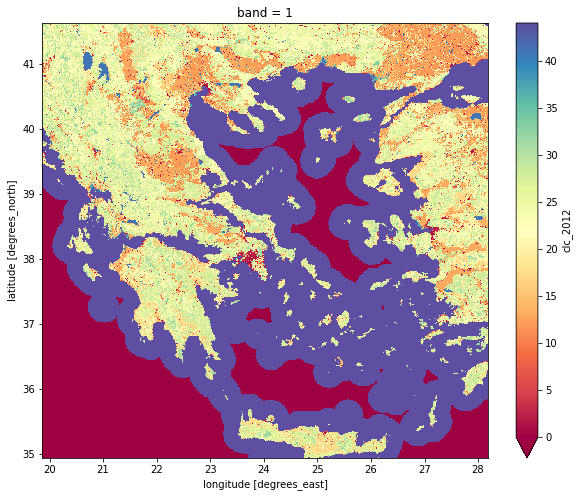

In [3]:
ds['clc_2012'].plot(cmap='Spectral', vmin=0, vmax=44, figsize=(10,8))

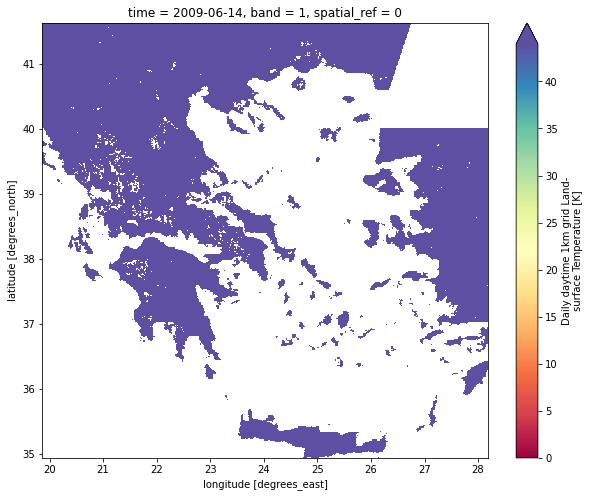

In [4]:
# for var in range(len(ds['1 km 16 days NDVI'])):
ds['LST_Day_1km'][100].plot(cmap='Spectral', vmin=0, vmax=44, figsize=(10,8))

In [5]:
for var in range(len(list(ds.keys()))):
     print(list(ds.keys())[var])

Fpar_500m
Lai_500m
FparLai_QC
FparExtra_QC
FparStdDev_500m
LaiStdDev_500m
1 km 16 days NDVI
1 km 16 days EVI
1 km 16 days VI Quality
ET_500m
LE_500m
PET_500m
PLE_500m
ET_QC_500m
LST_Day_1km
QC_Day
LST_Night_1km
QC_Night
era5_max_u10
era5_max_v10
era5_max_t2m
era5_max_tp
era5_min_u10
era5_min_v10
era5_min_t2m
era5_min_tp
ignition_points
burned_areas
number_of_fires
clc_2006
clc_2012
clc_2018
fwi
roads_density_2020
population_density_2009
population_density_2010
population_density_2011
population_density_2012
population_density_2013
population_density_2014
population_density_2015
population_density_2016
population_density_2017
population_density_2018
population_density_2019
population_density_2020
dem_mean
dem_std
dem_max
dem_min
aspect_mean
aspect_std
aspect_max
aspect_min
slope_mean
slope_std
slope_max
slope_min


In [6]:
def variables_of_nc(path2nc):
    import xarray as xr 
    ds = xr.open_dataset(path2nc)
    for var in range(len(list(ds.keys()))):
        print(list(ds.keys())[var])
   

In [7]:
variables_of_nc('./dataset_greece.nc')

Fpar_500m
Lai_500m
FparLai_QC
FparExtra_QC
FparStdDev_500m
LaiStdDev_500m
1 km 16 days NDVI
1 km 16 days EVI
1 km 16 days VI Quality
ET_500m
LE_500m
PET_500m
PLE_500m
ET_QC_500m
LST_Day_1km
QC_Day
LST_Night_1km
QC_Night
era5_max_u10
era5_max_v10
era5_max_t2m
era5_max_tp
era5_min_u10
era5_min_v10
era5_min_t2m
era5_min_tp
ignition_points
burned_areas
number_of_fires
clc_2006
clc_2012
clc_2018
fwi
roads_density_2020
population_density_2009
population_density_2010
population_density_2011
population_density_2012
population_density_2013
population_density_2014
population_density_2015
population_density_2016
population_density_2017
population_density_2018
population_density_2019
population_density_2020
dem_mean
dem_std
dem_max
dem_min
aspect_mean
aspect_std
aspect_max
aspect_min
slope_mean
slope_std
slope_max
slope_min


## 2. Data Conversion: NetCDF to Raster [Success but consumes space-time]

https://help.marine.copernicus.eu/en/articles/5029956-how-to-convert-netcdf-to-geotiffhttps://help.marine.copernicus.eu/en/articles/5029956-how-to-convert-netcdf-to-geotiff

https://stackoverflow.com/questions/54653536/xarray-datetime64ns-remove-or-normalise-time-from-datetime

In [11]:
import rioxarray as rio 
from tqdm.notebook import tqdm

### 2.1 Single variable 

In [7]:
LST_N = ds['LST_Night_1km']

In [8]:
LST_N 

<xarray.DataArray 'LST_Night_1km' (time: 4314, y: 562, x: 700)>
[1697127600 values with dtype=float64]
Coordinates:
  * time         (time) datetime64[ns] 2009-03-06 2009-03-07 ... 2020-12-26
    band         int64 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * x            (x) float64 19.86 19.87 19.89 19.9 ... 28.15 28.16 28.17 28.18
  * y            (y) float64 41.62 41.61 41.59 41.58 ... 34.97 34.96 34.95 34.94
Attributes:
    long_name:  Daily nighttime 1km grid Land-surface Temperature
    units:      K

In [9]:
# LST_N = LST_N.rio.set_spatial_dims('y', 'x')
LST_N.rio.crs

CRS.from_epsg(4326)

In [10]:
#To set the CRS
#LST_N.rio.set_crs("epsg:4326")

In [11]:
time_o = str(ds.indexes['time'].normalize()[77])
time_o
time_o[0:10]

'2009-05-22'

In [12]:
str(ds.indexes['time'].normalize()[77])[0:10]

'2009-05-22'

In [13]:
NDVI = ds['1 km 16 days NDVI']
NDVI

<xarray.DataArray '1 km 16 days NDVI' (time: 4314, y: 562, x: 700)>
[1697127600 values with dtype=float64]
Coordinates:
  * time         (time) datetime64[ns] 2009-03-06 2009-03-07 ... 2020-12-26
    band         int64 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * x            (x) float64 19.86 19.87 19.89 19.9 ... 28.15 28.16 28.17 28.18
  * y            (y) float64 41.62 41.61 41.59 41.58 ... 34.97 34.96 34.95 34.94
Attributes:
    long_name:  1 km 16 days NDVI
    units:      NDVI

In [14]:
len(LST_N[:])

4314

### Multiple Variables

In [15]:
print(f"Variable Name ---------------------------- CRS -------- Number of Files \n")
for var in range(len(list(ds.keys()))):
     print(f"{list(ds.keys())[var]:30} -------> {ds[list(ds.keys())[var]].rio.crs} -------- {len(ds[list(ds.keys())[var]][:])}")

Variable Name ---------------------------- CRS -------- Number of Files 

Fpar_500m                      -------> EPSG:4326 -------- 4314
Lai_500m                       -------> EPSG:4326 -------- 4314
FparLai_QC                     -------> EPSG:4326 -------- 4314
FparExtra_QC                   -------> EPSG:4326 -------- 4314
FparStdDev_500m                -------> EPSG:4326 -------- 4314
LaiStdDev_500m                 -------> EPSG:4326 -------- 4314
1 km 16 days NDVI              -------> EPSG:4326 -------- 4314
1 km 16 days EVI               -------> EPSG:4326 -------- 4314
1 km 16 days VI Quality        -------> EPSG:4326 -------- 4314
ET_500m                        -------> EPSG:4326 -------- 4314
LE_500m                        -------> EPSG:4326 -------- 4314
PET_500m                       -------> EPSG:4326 -------- 4314
PLE_500m                       -------> EPSG:4326 -------- 4314
ET_QC_500m                     -------> EPSG:4326 -------- 4314
LST_Day_1km                   

In [16]:
ds[list(ds.keys())[1]].rio.crs

CRS.from_epsg(4326)

In [17]:
len(ds[list(ds.keys())[4]][:])

4314

In [18]:
list(ds.keys())[var]

'slope_min'

### Down Them All as geoTIFFs

#### Download Simulation 

In [12]:
for var in tqdm(range(len(list(ds.keys())))):
    print(f" Downloading {list(ds.keys())[var]}")
    for i in tqdm(range(len(ds[list(ds.keys())[var]][:]))):
        ds[list(ds.keys())[var]][:][i].rio.crs

  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

KeyboardInterrupt: 

#### f(x) = nc2geoTIFF

In [61]:
print(" ----- Total Variables Count -------")
for var in tqdm(range(len(list(ds.keys())))): 
    print(f" Downloading {list(ds.keys())[var]}")
    for i in tqdm(range(len(ds[list(ds.keys())[var]][:]))):
        ds[list(ds.keys())[var]][:][i].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+list(ds.keys())[var]+"_"+str(ds.indexes['time'].normalize()[i])[0:10]+".tiff")
        

 ----- Total Variables Count -------


  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# start after from 5th in the list  
print(" ----- Total Variables Count -------")
for var in tqdm(range(len(list(ds.keys())))):  
    print(f" Downloading {list(ds.keys())[var+4]}")
    for i in tqdm(range(len(ds[list(ds.keys())[var+4]][:]))):
        ds[list(ds.keys())[var+4]][:][i].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+list(ds.keys())[var+4]+"_"+str(ds.indexes['time'].normalize()[i])[0:10]+".tiff")
        

 ----- Total Variables Count -------


  0%|          | 0/58 [00:00<?, ?it/s]

  0%|          | 0/4314 [00:00<?, ?it/s]

## 3. Data Conversion: NetCDF to Dataframe

https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/

https://xarray.pydata.org/en/stable/user-guide/pandas.html

https://stackoverflow.com/questions/65504116/how-to-convert-a-xarray-dataarray-to-a-geopandas-geodataframe

In [8]:
import geopandas as gpd
import rasterio
from rasterio.plot import show
from shapely.geometry import Point

In [9]:
ds['LST_Night_1km']

<xarray.DataArray 'LST_Night_1km' (time: 4314, y: 562, x: 700)>
[1697127600 values with dtype=float64]
Coordinates:
  * time         (time) datetime64[ns] 2009-03-06 2009-03-07 ... 2020-12-26
    band         int64 1
    spatial_ref  (time) int64 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
  * x            (x) float64 19.86 19.87 19.89 19.9 ... 28.15 28.16 28.17 28.18
  * y            (y) float64 41.62 41.61 41.59 41.58 ... 34.97 34.96 34.95 34.94
Attributes:
    long_name:  Daily nighttime 1km grid Land-surface Temperature
    units:      K

In [9]:
xarr = ds['LST_Night_1km'][0:5]

df = xarr.to_dataframe().reset_index()
gdf = gpd.GeoDataFrame(
      df, geometry=gpd.points_from_xy(df.y,df.x),crs="EPSG:4326")

gdf

,time,y,x,band,spatial_ref,LST_Night_1km,geometry
0,2009-03-06,41.617206,19.862915,1,0,NaN,POINT (41.61721 19.86292)
1,2009-03-06,41.617206,19.874819,1,0,NaN,POINT (41.61721 19.87482)
2,2009-03-06,41.617206,19.886723,1,0,NaN,POINT (41.61721 19.88672)
3,2009-03-06,41.617206,19.898627,1,0,NaN,POINT (41.61721 19.89863)
4,2009-03-06,41.617206,19.910531,1,0,NaN,POINT (41.61721 19.91053)
...,...,...,...,...,...,...,...
1966995,2009-03-10,34.939065,28.136192,1,0,NaN,POINT (34.93907 28.13619)
1966996,2009-03-10,34.939065,28.148096,1,0,NaN,POINT (34.93907 28.14810)
1966997,2009-03-10,34.939065,28.160000,1,0,NaN,POINT (34.93907 28.16000)
1966998,2009-03-10,34.939065,28.171904,1,0,NaN,POINT (34.93907 28.17190)


In [12]:
gdf.to_file("mygeofile.geojson", driver="GeoJSON"); # Creates 500 MB geojason file from above gdf with 6 snapshots of one var 

cols_to_use: https://stackoverflow.com/questions/19125091/pandas-merge-how-to-avoid-duplicating-columns

In [10]:
xarr = ds['LST_Night_1km'][0:360] # consuming entire 32 GB RAM 

df = xarr.to_dataframe().reset_index()
gdf = gpd.GeoDataFrame(
      df, geometry=gpd.points_from_xy(df.y,df.x),crs="EPSG:4326")

gdf

,time,y,x,band,spatial_ref,LST_Night_1km,geometry
0,2009-03-06,41.617206,19.862915,1,0,NaN,POINT (41.61721 19.86292)
1,2009-03-06,41.617206,19.874819,1,0,NaN,POINT (41.61721 19.87482)
2,2009-03-06,41.617206,19.886723,1,0,NaN,POINT (41.61721 19.88672)
3,2009-03-06,41.617206,19.898627,1,0,NaN,POINT (41.61721 19.89863)
4,2009-03-06,41.617206,19.910531,1,0,NaN,POINT (41.61721 19.91053)
...,...,...,...,...,...,...,...
141623995,2010-02-28,34.939065,28.136192,1,0,NaN,POINT (34.93907 28.13619)
141623996,2010-02-28,34.939065,28.148096,1,0,NaN,POINT (34.93907 28.14810)
141623997,2010-02-28,34.939065,28.160000,1,0,NaN,POINT (34.93907 28.16000)
141623998,2010-02-28,34.939065,28.171904,1,0,NaN,POINT (34.93907 28.17190)


In [11]:
# ALL 4314 Raster Snapshots
xarr = ds['LST_Night_1km'] # OUT OF MEMORY

df = xarr.to_dataframe().reset_index()
gdf = gpd.GeoDataFrame(
      df, geometry=gpd.points_from_xy(df.y,df.x),crs="EPSG:4326")

gdf

MemoryError: Unable to allocate 12.6 GiB for an array with shape (1697127600,) and data type int64

In [11]:
# Multiple variables in one dataframe 

xarr01 = ds['LST_Night_1km'][0:5]

df01 = xarr01.to_dataframe().reset_index()

xarr02 = ds['LST_Day_1km'][0:5]

df02 = xarr02.to_dataframe().reset_index()

df03 = ds['Lai_500m'][0:5].to_dataframe().reset_index()

cols_to_use = [df02.columns.difference(df01.columns),df03.columns.difference(df01.columns)]
print(cols_to_use)

df = pd.merge(df01, df02[cols_to_use[0]],df03[cols_to_use[1]], left_index=True, right_index=True, how='outer')
df
# df = pd.concat([df01, df02], axis = 1)
# df

[Index(['LST_Day_1km'], dtype='object'), Index(['Lai_500m'], dtype='object')]


TypeError: merge() got multiple values for argument 'how'

In [ ]:
list(ds.keys())[5]

In [31]:
pdf = pd.DataFrame(ds['LST_Night_1km'][7])
pdf

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...
1,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...
2,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...
3,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.DataArray 'LST_Night_1km' ()>\narray(n...,<xarray.Dat

In [24]:
pdf_LST = ds['LST_Night_1km'][7].to_pandas()
pdf_LST

x,19.862915,19.874819,19.886723,19.898627,19.910531,19.922435,19.934339,19.946243,19.958147,19.970051,...,28.076672,28.088576,28.100480,28.112384,28.124288,28.136192,28.148096,28.160000,28.171904,28.183808
y,,,,,,,,,,,,,,,,,,,,,
41.617206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.605302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.593398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.581494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41.569590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34.986681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34.974777,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34.962873,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
df02 = pd.DataFrame(
    {'City': ['Buenos Aires', 'Brasilia', 'Santiago', 'Bogota', 'Caracas'],
     'Country': ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Venezuela'],
     'Latitude': [-34.58, -15.78, -33.45, 4.60, 10.48],
     'Longitude': [-58.66, -47.91, -70.66, -74.08, -66.86]})

gdf = geopandas.GeoDataFrame(
    df02, geometry=geopandas.points_from_xy(df02.Longitude, df02.Latitude))

print(gdf.head())

           City    Country  Latitude  Longitude                     geometry
0  Buenos Aires  Argentina    -34.58     -58.66  POINT (-58.66000 -34.58000)
1      Brasilia     Brazil    -15.78     -47.91  POINT (-47.91000 -15.78000)
2      Santiago      Chile    -33.45     -70.66  POINT (-70.66000 -33.45000)
3        Bogota   Colombia      4.60     -74.08    POINT (-74.08000 4.60000)
4       Caracas  Venezuela     10.48     -66.86   POINT (-66.86000 10.48000)


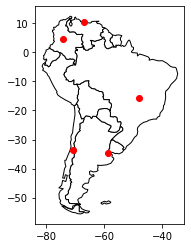

In [60]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to South America.
ax = world[world.continent == 'South America'].plot(
    color='white', edgecolor='black')

# We can now plot our ``GeoDataFrame``.
gdf.plot(ax=ax, color='red')

plt.show()

## 4. Connection with PostgreSQL (Second Approach)

https://pynative.com/python-postgresql-tutorial/


In [28]:
import psycopg2
from psycopg2 import Error

### Connect to an existing database

In [81]:
try:
    # Connect to an existing database
    connection = psycopg2.connect(user="postgres",
                                  password="bolbona",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="greece_wildfire")

    # Create a cursor to perform database operations
    cursor = connection.cursor()
    
    # Print PostgreSQL details
    print("PostgreSQL server information \n")
    print(connection.get_dsn_parameters(), "\n")
    
    # Executing a SQL query
    cursor.execute("SELECT version();")
    
    # Fetch result
    record = cursor.fetchone()
    print("You are connected to - ", record, "\n")

except (Exception, Error) as error:
    print("Error while connecting to PostgreSQL", error)
# finally:
#     if (connection):
#         cursor.close()
#         connection.close()
#         print("PostgreSQL connection is closed")

PostgreSQL server information 

{'user': 'postgres', 'channel_binding': 'prefer', 'dbname': 'greece_wildfire', 'host': '127.0.0.1', 'port': '5432', 'tty': '', 'options': '', 'sslmode': 'prefer', 'sslcompression': '0', 'ssl_min_protocol_version': 'TLSv1.2', 'gssencmode': 'prefer', 'krbsrvname': 'postgres', 'target_session_attrs': 'any'} 

You are connected to -  ('PostgreSQL 13.4, compiled by Visual C++ build 1914, 64-bit',) 



### Table Creation

In [55]:
# SQL query to create a new table
create_table_query = '''CREATE TABLE MOBILE_STORE
          (ID INT PRIMARY KEY     NOT NULL,
          MODEL           TEXT    NOT NULL,
          PRICE         REAL); '''

# Execute a command: this creates a new table
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")


Table created successfully in PostgreSQL 


### Insert Delete Update  
https://pynative.com/python-postgresql-insert-update-delete-table-data-to-perform-crud-operations/

In [15]:
def bulkInsert(records):
    try:
        connection = psycopg2.connect(user="postgres",
                                  password="bolbona",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="greece_wildfire")
        cursor = connection.cursor()
        sql_insert_query = """ INSERT INTO MOBILE_STORE (ID, MODEL, PRICE) VALUES (%s,%s,%s)""" 

        # executemany() to insert multiple rows
        result = cursor.executemany(sql_insert_query, records)
        connection.commit()
        print(cursor.rowcount, "Record inserted successfully into mobile table")

    except (Exception, psycopg2.Error) as error:
        print("Failed inserting record into mobile table {}".format(error))

    finally:
        # closing database connection.
        if connection:
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

In [56]:
    postgres_insert_query = """ INSERT INTO MOBILE_STORE (ID, MODEL, PRICE) VALUES (%s,%s,%s)"""
    record_to_insert = (1, 'Apple Iphone 13', 1450)
    cursor.execute(postgres_insert_query, record_to_insert)

    connection.commit()
    count = cursor.rowcount
    print(count, "Record inserted successfully into mobile table")



1 Record inserted successfully into mobile table


In [22]:
   
    
    postgres_insert_query = """ INSERT INTO MOBILE_STORE (ID, MODEL, PRICE) VALUES (%s,%s,%s)"""
    record_to_insert = (10, 'Orange X Phone', 1000)
    cursor.execute(postgres_insert_query, record_to_insert)

    connection.commit()
    count = cursor.rowcount
    print(count, "Record inserted successfully into mobile table")



1 Record inserted successfully into mobile table


In [75]:
records_to_insert = [(8, 'Samhjkhkjjhke', 910), (9, 'fghh', 550)]
bulkInsert(records_to_insert)

2 Record inserted successfully into mobile table
PostgreSQL connection is closed


In [19]:
query03 = '''select * from mobile_store;'''
cursor.execute(query03)
for i in cursor.fetchall():
    print(i)
    
connection.commit()
connection.close()
  

(1, 'Apple Iphone 13', 1450.0)
(2, 'Sony Xperia 1 iii', 1800.0)
(3, 'Samsung S22 Ultra', 9000.0)
(4, 'LG Nova X', 1200.0)
(5, 'One Plus 10 NOrd', 950.0)
(6, 'Samsung S21 Note', 9000.0)
(7, 'Moto G12', 550.0)
(8, 'Samhjkhkjjhke', 910.0)
(9, 'fghh', 550.0)


In [32]:
gdf

,LST_Night_1km,geometry
time,,
2009-03-06,NaN,POINT (41.61721 19.86292)
2009-03-06,NaN,POINT (41.61721 19.87482)
2009-03-06,NaN,POINT (41.61721 19.88672)
2009-03-06,NaN,POINT (41.61721 19.89863)
2009-03-06,NaN,POINT (41.61721 19.91053)
...,...,...
2009-03-15,NaN,POINT (34.93907 28.13619)
2009-03-15,NaN,POINT (34.93907 28.14810)
2009-03-15,NaN,POINT (34.93907 28.16000)


In [38]:
# SQL query to create a new table
create_table_query = '''CREATE TABLE lst_snap
          (ID INT PRIMARY KEY     NOT NULL,
          geom geometry NOT NULL,
          timepoint timestamp NOT NULL,
          lst_pixel numeric NOT NULL); '''

# Execute a command: this creates a new table
cursor.execute(create_table_query)
connection.commit()
print("Table created successfully in PostgreSQL ")


Table created successfully in PostgreSQL 


In [73]:
gdf.loc[:,"geometry"]

time
2009-03-06    POINT (41.61721 19.86292)
2009-03-06    POINT (41.61721 19.87482)
2009-03-06    POINT (41.61721 19.88672)
2009-03-06    POINT (41.61721 19.89863)
2009-03-06    POINT (41.61721 19.91053)
                        ...            
2009-03-15    POINT (34.93907 28.13619)
2009-03-15    POINT (34.93907 28.14810)
2009-03-15    POINT (34.93907 28.16000)
2009-03-15    POINT (34.93907 28.17190)
2009-03-15    POINT (34.93907 28.18381)
Name: geometry, Length: 3934000, dtype: geometry

In [83]:
   
# for i in len(gdf)
postgres_insert_query = """ INSERT INTO lst_snap (ID, geom, timepoint, lst_pixel) VALUES (%s,%s,%s,%s)"""
record_to_insert = gdf
cursor.execute(postgres_insert_query, record_to_insert)

connection.commit()
count = cursor.rowcount
print(count, "Record inserted successfully into mobile table")



KeyError: 0

### From CSV

### Creation of Table for Geosaptial Data
* Create table for some geosaptial data
* populate the table with single variable data from the given nc file (alternate to `raster2pgsql`): **nc2pgsql**
* try to query over that data

In [41]:
def nc2pgsql(geodata, projection,pixelSizeX,pixelSizeY):
    try:
        connection = psycopg2.connect(user="postgres",
                                  password="bolbona",
                                  host="127.0.0.1",
                                  port="5432",
                                  database="greece_wildfire")
        cursor = connection.cursor()
        #sql_insert_query = """ raster2pgsql -d -I -C -M -F -t 50x50 -s 4326 "geodata public.LST|psql -h localhost -d greece_wildfire -p 5432 -U postgres -f""" 
        #sql_insert_query = 'raster2pgsql -s '+projection+' -I -C -M "'+geodata+'" -F -t '+pixelSizeX+'x'+pixelSizeY+' public.'+geodata+' | psql -d greece_wildfire -U postgres_user -p 5432'
        sql_insert_query = 'raster2pgsql -d -I -C -M -F -t '+pixelSizeX+'x'+pixelSizeY + projection+' -I -C -M "'+geodata+'"'+pixelSizeX+'x'+pixelSizeY+' public.'+geodata+' | psql -d greece_wildfire -U postgres_user -p 5432'

        # executemany() to insert multiple rows
        result = cursor.executemany(sql_insert_query, geodata)
        connection.commit()
        print(cursor.rowcount, "Record inserted successfully into mobile table")

    except (Exception, psycopg2.Error) as error:
        print("Failed inserting record into mobile table {}".format(error))

    finally:
        # closing database connection.
        if connection:
            cursor.close()
            connection.close()
            print("PostgreSQL connection is closed")

In [42]:
nc2pgsql(ds['LST_Day_1km'][100].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+"Test_LST"+".tiff"), 4326, 100, 100)

Failed inserting record into mobile table can only concatenate str (not "int") to str
PostgreSQL connection is closed


In [29]:
from osgeo import gdal, osr
import psycopg2
import subprocess
fileName=ds['LST_Day_1km'][100].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+"Test_LST"+".tiff") #tiff_file_name and location
raster = gdal.Open(fileName)
proj = osr.SpatialReference(wkt=raster.GetProjection())
projection=str(proj.GetAttrValue('AUTHORITY',1))

RuntimeError: not a string

In [ ]:
ds[list(ds.keys())[var]][:][i].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+list(ds.keys())[var]+"_"+str(ds.indexes['time'].normalize()[i])[0:10]+".tiff")
        

In [34]:
print(ds['LST_Day_1km'][100].rio.to_raster("Test_LST.tiff"))

None


In [28]:
ds['LST_Day_1km'][100].rio.to_raster(r"Z:\\workspace_Python\\Greece\\"+"Test_LST"+".tiff")

## 4. Integration with Ontop